<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M0.532 · Pattern Recognition</p>
<p style="margin: 0; text-align:right;">Computational Engineering and Mathematics Master</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Computers, Multimedia and Telecommunications Department</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

In this notebook, we will see how to use the [YOLACT](https://github.com/dbolya/yolact) model for object tracking and video object segmentation. This model does not only predicts the bounding box of the object being tracked but also the instance segmentation mask at every frame. YOLACT is caracterized by its efficiency, allowing real-time instance segmentation in videos. This notebook is based on this [notebook](https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/YOLACT.ipynb)


You need to have GPU activated (Change runtime type) for running this notebook.

First of all, we import some basic modules and clone the github repository of YOLACT.

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/dbolya/yolact.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q --depth 1 {git_repo_url}
  !pip install -q youtube-dl

import sys
sys.path.append(project_name)

from IPython.display import YouTubeVideo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.2 MB/s eta 0:00:00


Let's install the dependencies needed:

In [2]:
!cd yolact

In [3]:
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib

Then, we download the pretrained YOLACT model.

In [7]:
!mkdir yolact/weights

In [8]:
!gdown 1UYy3dMapbH1BnmtZU4WH1zbYgOzzHHf_ -O yolact/weights/yolact_base_54_800000.pth


Downloading...
From (original): https://drive.google.com/uc?id=1UYy3dMapbH1BnmtZU4WH1zbYgOzzHHf_
From (redirected): https://drive.google.com/uc?id=1UYy3dMapbH1BnmtZU4WH1zbYgOzzHHf_&confirm=t&uuid=9a88eed1-ffac-4f90-9dc5-6f0eb76bbf35
To: /content/yolact/weights/yolact_base_54_800000.pth
100% 204M/204M [00:05<00:00, 39.8MB/s]


We can test the algorithm with a sample image:

In [9]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg

In [11]:
# Process an image and save it to another file.
!python yolact/eval.py --trained_model=yolact/weights/yolact_base_54_800000.pth --score_threshold=0.15 --top_k=15  --image=input.jpg:output.jpg


Config not specified. Parsed yolact_base_config from the file name.

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)
/usr/local/lib/python3.10/dist-packages/torch/jit/_recursive.py:313: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/jit/_recursive.py:313: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/jit/_recursive.py:313: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider 

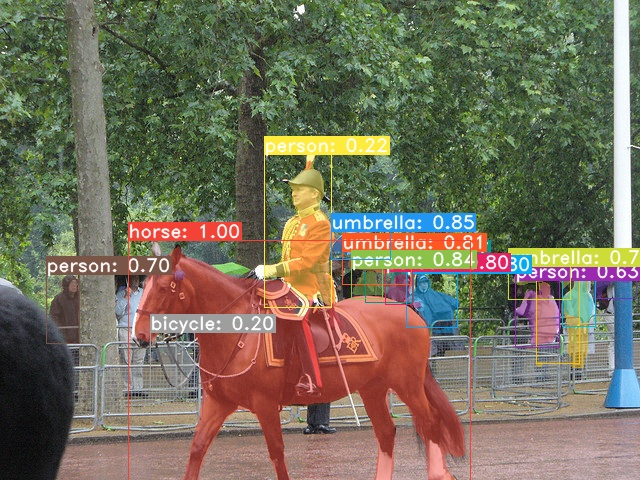

In [12]:
from IPython.display import Image
Image('output.jpg')

We download the video that we will use for inference. We decide to use the same video as in the previous notebooks (the one we used for SiamMask) to compare the results obtained with both models on the same image.

In [13]:
!wget https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4

--2024-06-26 15:52:05--  https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4
Resolving www.bogotobogo.com (www.bogotobogo.com)... 173.254.30.214
Connecting to www.bogotobogo.com (www.bogotobogo.com)|173.254.30.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2018126 (1.9M) [video/mp4]
Saving to: ‘slow_traffic_small.mp4’

slow_traffic_small. 100%[===================>]   1.92M  7.22MB/s    in 0.3s    

2024-06-26 15:52:14 (7.22 MB/s) - ‘slow_traffic_small.mp4’ saved [2018126/2018126]



We run the YOLACT model on the given image with the eval.py script.

In [14]:

# Process a video and save it to another file. This uses the same pipeline as the ones above now, so it's fast!
!python yolact/eval.py --trained_model=yolact/weights/yolact_base_54_800000.pth --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video=slow_traffic_small.mp4:slow_traffic_small_output.mp4

Config not specified. Parsed yolact_base_config from the file name.

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)
/usr/local/lib/python3.10/dist-packages/torch/jit/_recursive.py:313: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/jit/_recursive.py:313: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/jit/_recursive.py:313: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider 

In [17]:
# encode with FFMPEG otherwise can't embedd in colab!
!ffmpeg -y -loglevel panic -i slow_traffic_small_output.mp4 slow_traffic_small_output_ffmpeg.mp4

Finally, we visualize the output video with the predictions.

In [18]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('slow_traffic_small_output_ffmpeg.mp4')